## Kadenze tutorial number 3

Written by KN, Feb-2017

Based largely on: https://github.com/pkmital/CADL/tree/master/session-3

In [73]:
# Imports
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import IPython.display as ipyd
plt.style.use('ggplot')
from tensorflow.python.framework.ops import reset_default_graph

In [3]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [5]:
# Load-up MNIST data
ds = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
trainData = ds.train.images
print(trainData.shape)
trainLabels = ds.train.labels
print(trainLabels.shape)

(55000, 784)
(55000, 10)


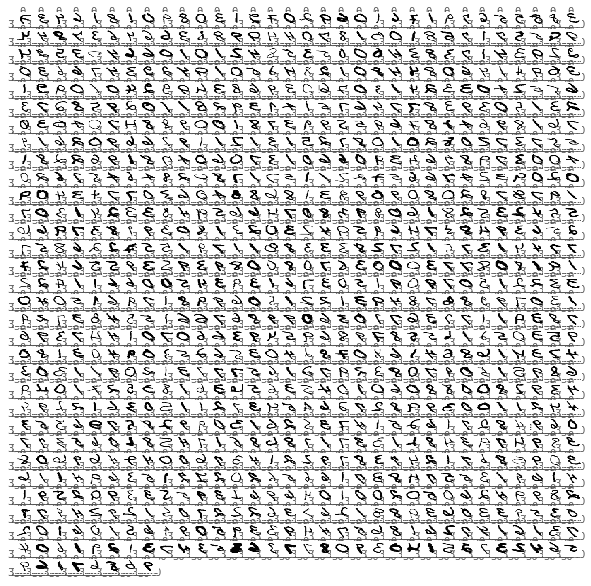

In [31]:
width = 28

# Look at some images
numLook = 1000
imgs = trainData[:numLook,:].reshape((-1, width, width))
numRows_im = int(np.ceil(np.sqrt(numLook)))
plt.figure(figsize=[8,8])
for i in range(numLook):
    plt.subplot(numRows_im,numRows_im,i+1)
    plt.pcolormesh(imgs[i], cmap='Greys')
plt.tight_layout()

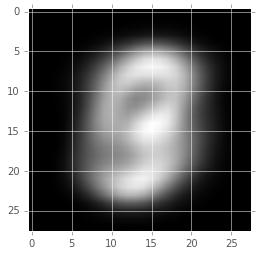

In [43]:
# Take the mean across all images
mean_img = np.mean(trainData, axis=0)

# Then plot the mean image.
plt.figure()
plt.imshow(mean_img.reshape((width, width)), cmap='gray')

## Making a fully-connected autoencoder

In [32]:
# internal layer dimensions
dimensions = [512, 256, 128, 64]
# Num input features, when collapse onto single vector:
n_features = trainData.shape[1]
# mean and std initializations
mean_init = 0.0
std_init = 0.01

In [33]:
# TF placeholders
X = tf.placeholder(tf.float32, [None, n_features])

In [34]:
# Copy X placeholder to the name current_input, which is fed through
current_input = X
n_input = n_features

# List to hold all weight matrices
Ws = []

# Create each layer:
for layer_i, n_output in enumerate(dimensions):
    
    with tf.variable_scope("encoder/layer/{0}".format(layer_i)):

        # Create a weight matrix 
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=mean_init, stddev=std_init))

        # Mltiply input by newly created W matrix and add the bias
        h = tf.matmul(current_input, W)

        # Relu activation function on its output
        current_input = tf.nn.relu(h)

        # Store weight matrix so can build the decoder.
        Ws.append(W)

        # Update for next iteration
        n_input = n_output

In [36]:
print(current_input.get_shape())

(?, 64)


[u'Placeholder',
 u'encoder/layer/0/W',
 u'encoder/layer/0/W/Initializer/random_normal/shape',
 u'encoder/layer/0/W/Initializer/random_normal/mean',
 u'encoder/layer/0/W/Initializer/random_normal/stddev',
 u'encoder/layer/0/W/Initializer/random_normal/RandomStandardNormal',
 u'encoder/layer/0/W/Initializer/random_normal/mul',
 u'encoder/layer/0/W/Initializer/random_normal',
 u'encoder/layer/0/W/Assign',
 u'encoder/layer/0/W/read',
 u'encoder/layer/0/MatMul',
 u'encoder/layer/0/Relu',
 u'encoder/layer/1/W',
 u'encoder/layer/1/W/Initializer/random_normal/shape',
 u'encoder/layer/1/W/Initializer/random_normal/mean',
 u'encoder/layer/1/W/Initializer/random_normal/stddev',
 u'encoder/layer/1/W/Initializer/random_normal/RandomStandardNormal',
 u'encoder/layer/1/W/Initializer/random_normal/mul',
 u'encoder/layer/1/W/Initializer/random_normal',
 u'encoder/layer/1/W/Assign',
 u'encoder/layer/1/W/read',
 u'encoder/layer/1/MatMul',
 u'encoder/layer/1/Relu',
 u'encoder/layer/2/W',
 u'encoder/layer

In [40]:
# To make other end of autoencoder, reverse the order of weight matrices
Ws2 = Ws[::-1]

# dimensions all the way through
dimensions2 = dimensions[::-1][1:] + [n_features]
dimensions_full = dimensions + dimensions2
print(dimensions_full)

[512, 256, 128, 64, 128, 256, 512, 784]


In [41]:
# Make second half of network
for layer_i, n_output in enumerate(dimensions2):

    with tf.variable_scope("decoder/layer/{0}".format(layer_i)):

        W = tf.transpose(Ws2[layer_i])

        # Now we'll multiply our input by our transposed W matrix
        h = tf.matmul(current_input, W)   # start with using current input as first defined above

        # Relu activation 
        current_input = tf.nn.relu(h)

        # Update
        n_input = n_output

In [42]:
# To get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in g.get_operations()]

[u'Placeholder',
 u'encoder/layer/0/W',
 u'encoder/layer/0/W/Initializer/random_normal/shape',
 u'encoder/layer/0/W/Initializer/random_normal/mean',
 u'encoder/layer/0/W/Initializer/random_normal/stddev',
 u'encoder/layer/0/W/Initializer/random_normal/RandomStandardNormal',
 u'encoder/layer/0/W/Initializer/random_normal/mul',
 u'encoder/layer/0/W/Initializer/random_normal',
 u'encoder/layer/0/W/Assign',
 u'encoder/layer/0/W/read',
 u'encoder/layer/0/MatMul',
 u'encoder/layer/0/Relu',
 u'encoder/layer/1/W',
 u'encoder/layer/1/W/Initializer/random_normal/shape',
 u'encoder/layer/1/W/Initializer/random_normal/mean',
 u'encoder/layer/1/W/Initializer/random_normal/stddev',
 u'encoder/layer/1/W/Initializer/random_normal/RandomStandardNormal',
 u'encoder/layer/1/W/Initializer/random_normal/mul',
 u'encoder/layer/1/W/Initializer/random_normal',
 u'encoder/layer/1/W/Assign',
 u'encoder/layer/1/W/read',
 u'encoder/layer/1/MatMul',
 u'encoder/layer/1/Relu',
 u'encoder/layer/2/W',
 u'encoder/layer

In [50]:
# now, 'current_input' is output of autoencoder (i.e., orig image)
Y = current_input

In [66]:
# define cost function
cost = tf.reduce_mean(tf.reduce_mean(tf.squared_difference(X, Y), 1))
print(cost.get_shape())

()


In [52]:
# Make optimizer
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [53]:
# Create a session
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [70]:
trainData.shape

(55000, 784)

(0, 0.046918131)
(1, 0.040577911)
(2, 0.038485691)
(3, 0.036047187)
(4, 0.033657741)


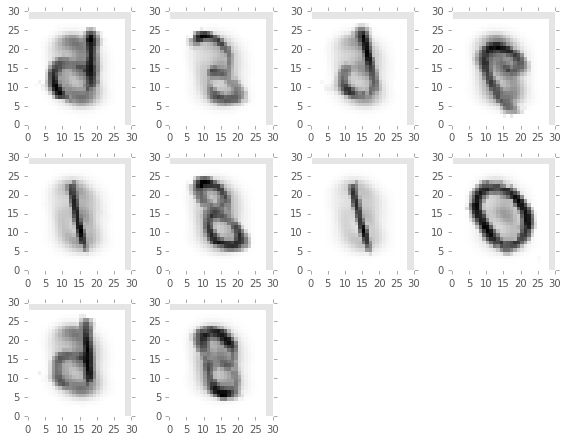

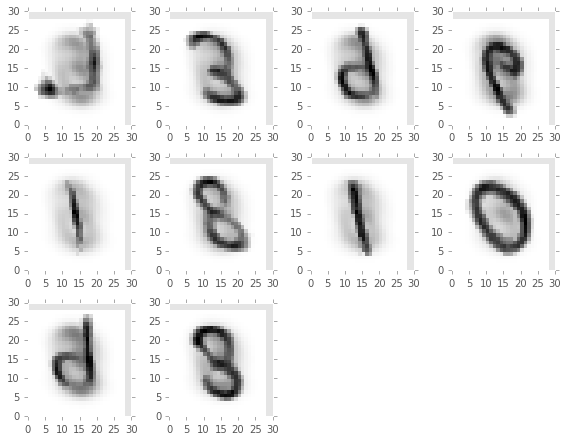

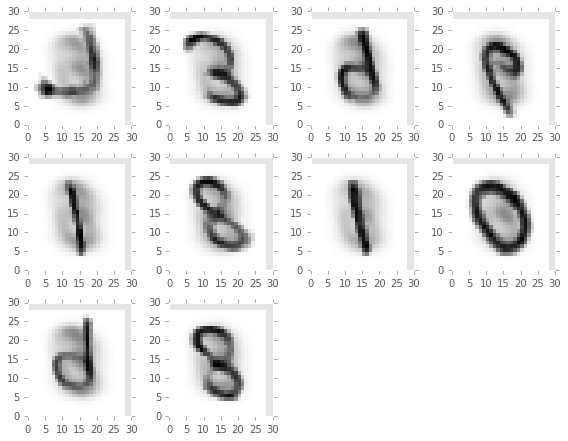

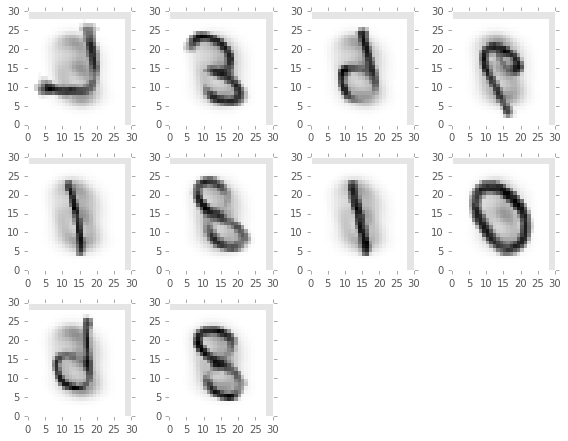

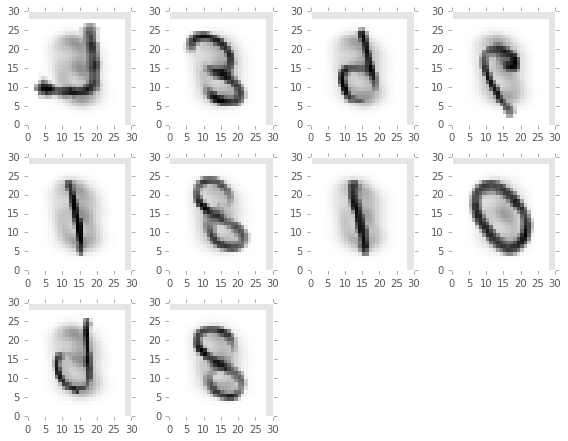

In [72]:
# Train model
batch_size = 100
n_epochs = 5
n_batches = int(np.floor(trainData.shape[0]/np.float(batch_size)))

# Monitor how first few images can be reconstructed
numEx_im = 10
examples = trainData[:numEx_im]
n_rows_exIm = np.ceil(np.sqrt(numEx_im))
maxVal_imshow = 255

# We'll store the reconstructions in a list
#imgs = []

for epoch_i in range(n_epochs):
    
    # Run through batches
    for batch_j in range(n_batches):
        batch_X, labels_x = ds.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    
    # Print how we're doing
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
    
    # plot examples
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, width, width)), 0, maxVal_imshow)
    plt.figure(figsize=[8,8])
    for i in range(len(examples)):
        plt.subplot(n_rows_exIm,n_rows_exIm,i+1)
        plt.pcolormesh(recon[i], cmap='Greys')
    plt.tight_layout()
    

In [62]:
a, b = ds.train.next_batch(batch_size)
a.shape

(100, 784)

## Making a conv net autoencoder

In [83]:
# reset
reset_default_graph()

In [84]:
X = tf.placeholder(tf.float32, [None, n_features])

# Need to reshape b/c doing convolutions
X_tensor = tf.reshape(X, [-1, width, width, 1])

In [85]:
# Now, instead of matrix multiplications, do convolutions
# Relevant params/settings:
n_filters = [16, 16, 16]
filter_sizes = [4, 4, 4]


In [86]:
current_input = X_tensor

# N input features corresponds to N channels now
n_input = 1

# Keep weight matrices again
Ws = []

# Also want to keep track of layer shapes
shapes = []

# Loop to create each layer:
for layer_i, n_output in enumerate(n_filters):

    with tf.variable_scope("encoder/layer/{}".format(layer_i)):
        
        shapes.append(current_input.get_shape().as_list())

        # Create a weight matrix 
        W = tf.get_variable(
            name='W',
            shape=[
                filter_sizes[layer_i],
                filter_sizes[layer_i],
                n_input,
                n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))

        # Now onvolve input by W matrix
        h = tf.nn.conv2d(current_input, W,
            strides=[1, 2, 2, 1], padding='SAME')

        # And then use a relu activation function on its output
        current_input = tf.nn.relu(h)

        # Finally store the weight matrix (so can build the decoder)
        Ws.append(W)

        # Update
        n_input = n_output

In [88]:
# As before, do reverse process 

Ws.reverse()
shapes.reverse()
n_filters.reverse()
# append the last filter size which is our input image's number of channels
n_filters = n_filters[1:] + [1]

print(n_filters, filter_sizes, shapes)

([16, 16, 1], [4, 4, 4], [[None, 7, 7, 16], [None, 14, 14, 16], [None, 28, 28, 1]])


In [89]:
# And again as before, do decoder filters now

for layer_i, shape in enumerate(shapes):

    with tf.variable_scope("decoder/layer/{}".format(layer_i)):

        W = Ws[layer_i]

        # Now we'll convolve by the transpose of our previous convolution tensor
        h = tf.nn.conv2d_transpose(current_input, W,
            tf.pack([tf.shape(X)[0], shape[1], shape[2], shape[3]]),
            strides=[1, 2, 2, 1], padding='SAME')

        # And then use a relu activation function on its output
        current_input = tf.nn.relu(h)

In [92]:
Y = current_input
Y = tf.reshape(Y, [-1, n_features])

In [94]:
# This is exactly the same as before
cost = tf.reduce_mean(tf.reduce_mean(tf.squared_difference(X, Y), 1))
learning_rate = 0.001

# pass learning rate and cost to optimize
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Session to manage vars/train
sess = tf.Session()
sess.run(tf.initialize_all_variables())

(0, 0.027002929)
(1, 0.025946641)
(2, 0.025865676)
(3, 0.025037505)
(4, 0.024010438)


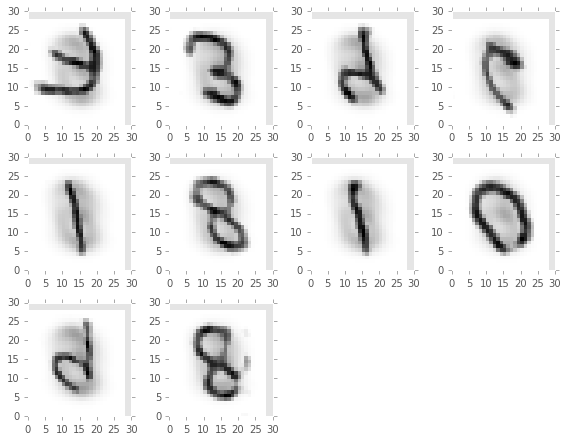

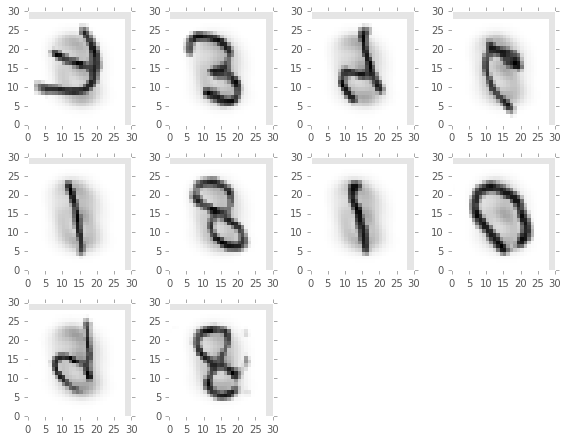

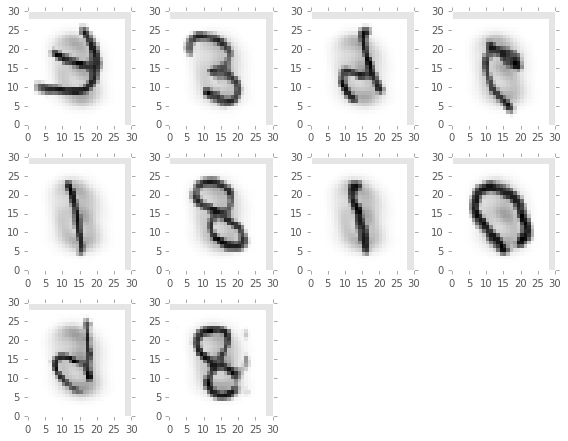

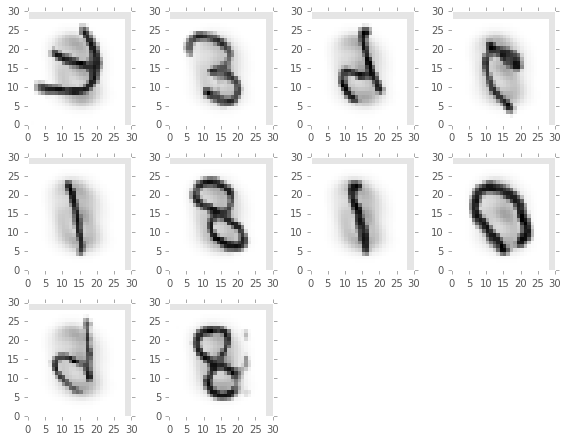

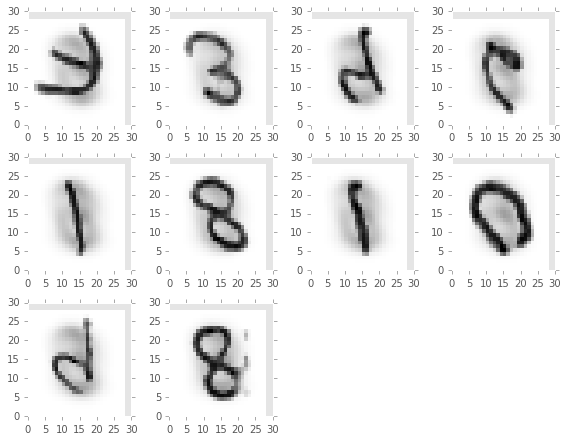

In [95]:
# Train model
batch_size = 100
n_epochs = 5
n_batches = int(np.floor(trainData.shape[0]/np.float(batch_size)))

# Monitor how first few images can be reconstructed
numEx_im = 10
examples = trainData[:numEx_im]
n_rows_exIm = np.ceil(np.sqrt(numEx_im))
maxVal_imshow = 255

# We'll store the reconstructions in a list
#imgs = []

for epoch_i in range(n_epochs):
    
    # Run through batches
    for batch_j in range(n_batches):
        batch_X, labels_x = ds.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    
    # Print how we're doing
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
    
    # plot examples
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, width, width)), 0, maxVal_imshow)
    plt.figure(figsize=[8,8])
    for i in range(len(examples)):
        plt.subplot(n_rows_exIm,n_rows_exIm,i+1)
        plt.pcolormesh(recon[i], cmap='Greys')
    plt.tight_layout()

## Do supervised learning with a fully connected network

In [100]:
# reset
reset_default_graph()

In [101]:
n_input = width*width
n_output = 10    # number of one-hot encodings

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [102]:
def flatten(x, name=None, reuse=None):
    """Flatten Tensor to 2-dimensions.
    Parameters
    ----------
    x : tf.Tensor
        Input tensor to flatten.
    name : None, optional
        Variable scope for flatten operations
    Returns
    -------
    flattened : tf.Tensor
        Flattened tensor.
    """
    with tf.variable_scope('flatten'):
        dims = x.get_shape().as_list()
        if len(dims) == 4:
            flattened = tf.reshape(
                x,
                shape=[-1, dims[1] * dims[2] * dims[3]])
        elif len(dims) == 2 or len(dims) == 1:
            flattened = x
        else:
            raise ValueError('Expected n dimensions of 1, 2 or 4.  Found:',
                             len(dims))

        return flattened

In [99]:
tf.contrib.layers.xavier_initializer?

In [103]:
def linearLayer(x, n_output, name=None, activation=None, reuse=None):
    """Fully connected layer.
    Parameters
    ----------
    x : tf.Tensor
        Input tensor to connect
    n_output : int
        Number of output neurons
    name : None, optional
        Scope to apply
    Returns
    -------
    h, W : tf.Tensor, tf.Tensor
        Output of fully connected layer and the weight matrix
    """
    if len(x.get_shape()) != 2:
        x = flatten(x, reuse=reuse)

    n_input = x.get_shape().as_list()[1]

    with tf.variable_scope(name or "fc", reuse=reuse):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            dtype=tf.float32,
            initializer=tf.contrib.layers.xavier_initializer())

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.constant_initializer(0.0))

        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(x, W),
            bias=b)

        if activation:
            h = activation(h)

        return h, W

In [104]:
# Make a linear layer
Y_pred, W = linearLayer(x=X,n_output=n_output,activation=tf.nn.softmax,name='layer1')

In [105]:
# Define cost and optimizer
# Need to add 1e-12 because the log is undefined at 0.
learning_rate = 0.001
cross_entropy = -tf.reduce_sum(Y * tf.log(Y_pred + 1e-12))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [106]:
# Just to see (not used in training)
predicted_y = tf.argmax(Y_pred, 1)
actual_y = tf.argmax(Y, 1)
correct_prediction = tf.equal(predicted_y, actual_y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [111]:
# Train
sess = tf.Session()
sess.run(tf.initialize_all_variables())

# Now actually do some training:
batch_size = 100
n_epochs = 5
for epoch_i in range(n_epochs):
    
    # Run through batches
    for batch_j in range(n_batches):
        batch_X, labels_x = ds.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_X, Y:labels_x})
        
    validation_data = ds.validation
    print(sess.run(accuracy,
                   feed_dict={
                       X: validation_data.images,
                       Y: validation_data.labels
                   }))

# Print final test accuracy:
test_data = ds.test
print('\nOverall:')
print(sess.run(accuracy,
               feed_dict={
                   X: test_data.images,
                   Y: test_data.labels
               }))

0.9032
0.9166
0.9192
0.9252
0.9258

Overall:
0.9246


### What's going on inside the graph

In [112]:
# First get the graph that we used to compute the network
g = tf.get_default_graph()

In [113]:
# And can inspect everything inside of it
[op.name for op in g.get_operations()]

[u'Placeholder',
 u'Placeholder_1',
 u'layer1/W',
 u'layer1/W/Initializer/random_uniform/shape',
 u'layer1/W/Initializer/random_uniform/min',
 u'layer1/W/Initializer/random_uniform/max',
 u'layer1/W/Initializer/random_uniform/RandomUniform',
 u'layer1/W/Initializer/random_uniform/sub',
 u'layer1/W/Initializer/random_uniform/mul',
 u'layer1/W/Initializer/random_uniform',
 u'layer1/W/Assign',
 u'layer1/W/read',
 u'layer1/b',
 u'layer1/b/Initializer/Const',
 u'layer1/b/Assign',
 u'layer1/b/read',
 u'layer1/MatMul',
 u'layer1/h',
 u'layer1/Softmax',
 u'add/y',
 u'add',
 u'Log',
 u'mul',
 u'Const',
 u'Sum',
 u'Neg',
 u'gradients/Shape',
 u'gradients/Const',
 u'gradients/Fill',
 u'gradients/Neg_grad/Neg',
 u'gradients/Sum_grad/Reshape/shape',
 u'gradients/Sum_grad/Reshape',
 u'gradients/Sum_grad/Shape',
 u'gradients/Sum_grad/Tile',
 u'gradients/mul_grad/Shape',
 u'gradients/mul_grad/Shape_1',
 u'gradients/mul_grad/BroadcastGradientArgs',
 u'gradients/mul_grad/mul',
 u'gradients/mul_grad/Sum'

In [114]:
# Want to look at weight matrix
# Need to add 0 to get result of operation
W_examine = g.get_tensor_by_name('layer1/W:0')
W_arr = np.array(W_examine.eval(session=sess))
print(W_arr.shape)

(784, 10)


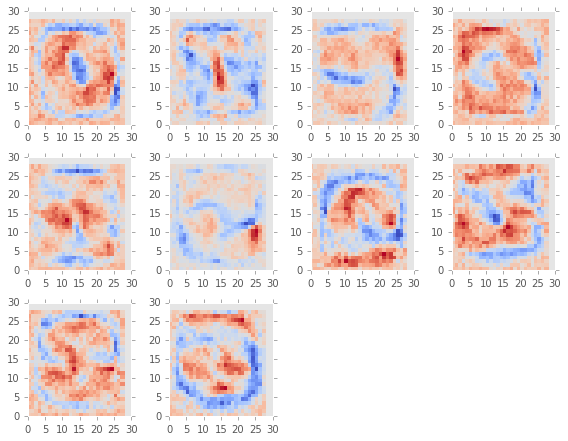

In [116]:
plt.figure(figsize=[8,8])
numRow = int(np.ceil(np.sqrt(W_arr.shape[1])))
for col_i in range(W_arr.shape[1]):
    plt.subplot(numRow,numRow, col_i+1)
    plt.pcolormesh(W_arr[:, col_i].reshape((width, width)), cmap='coolwarm')
plt.tight_layout()

## Do supervised learning with conv net

In [117]:
# reset
reset_default_graph()

In [119]:
n_features = trainData.shape[1]
n_labels = ds.train.labels.shape[1]

X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_labels])

# Need to reshape b/c doing convolutions
X_tensor = tf.reshape(X, [-1, width, width, 1])

In [120]:
# Define first layer
filter_size = 5
n_filters_in = 1
n_filters_out = 32

W_1 = tf.get_variable(
    name='W',
    shape=[filter_size, filter_size, n_filters_in, n_filters_out],
    initializer=tf.random_normal_initializer())

b_1 = tf.get_variable(
    name='b',
    shape=[n_filters_out],
    initializer=tf.constant_initializer())

h_1 = tf.nn.relu(
    tf.nn.bias_add(
        tf.nn.conv2d(input=X_tensor,
                     filter=W_1,
                     strides=[1, 2, 2, 1],
                     padding='SAME'),
                    b_1))

In [121]:
# Define second layer
n_filters_in = 32
n_filters_out = 64

W_2 = tf.get_variable(
    name='W2',
    shape=[filter_size, filter_size, n_filters_in, n_filters_out],
    initializer=tf.random_normal_initializer())

b_2 = tf.get_variable(
    name='b2',
    shape=[n_filters_out],
    initializer=tf.constant_initializer())

h_2 = tf.nn.relu(
    tf.nn.bias_add(
        tf.nn.conv2d(input=h_1,
                 filter=W_2,
                 strides=[1, 2, 2, 1],
                 padding='SAME'),
                 b_2))

In [122]:
# Now connect to a fully-connected/linear layer:
magicNum = 7  # ??
h_2_flat = tf.reshape(h_2, [-1, magicNum * magicNum * n_filters_out])

n_out = 128
h_3, W = linearLayer(h_2_flat, n_out, activation=tf.nn.relu, name='fc_1')

In [123]:
# And one final FC layer & softmax to get probs
Y_pred, W = linearLayer(h_3, n_labels, activation=tf.nn.softmax, name='fc_2')

In [124]:
# Define loss fxn in same way
cross_entropy = -tf.reduce_sum(Y * tf.log(Y_pred + 1e-12))
optimizer = tf.train.AdamOptimizer().minimize(cross_entropy)

# with accuracy for our monitoring
correct_prediction = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [125]:
# create session
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [126]:
# Train in exact same way

batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    
    for batch_j in range(n_batches):
        batch_X, labels_x = ds.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_X, Y:labels_x})
        
    validation_data = ds.validation
    print(sess.run(accuracy,
                   feed_dict={
                       X: validation_data.images,
                       Y: validation_data.labels
                   }))

# Print final test accuracy:
test_data = ds.test
print('\nOverall:')
print(sess.run(accuracy,
               feed_dict={
                   X: test_data.images,
                   Y: test_data.labels
               }))

0.844
0.9588
0.97
0.9754
0.9764
0.9758
0.9794
0.9786
0.98
0.9772

Overall:
0.978


In [130]:
# Look at layers inside
W1 = sess.run(W_1)
W2 = sess.run(W_2)

In [137]:
def plotLayerRaw(W, figsize=[8,8], dim2=0):
    """ Plots pcolormesh of learned filter weights"""
    numR = int(np.ceil(np.sqrt(W.shape[3])))
    plt.figure(figsize=figsize)
    for i in range(W.shape[3]):
        plt.subplot(numR, numR, i+1)
        plt.pcolormesh(W[:,:,dim2,i], cmap='Greys')
    plt.tight_layout()

(5, 5, 1, 32)


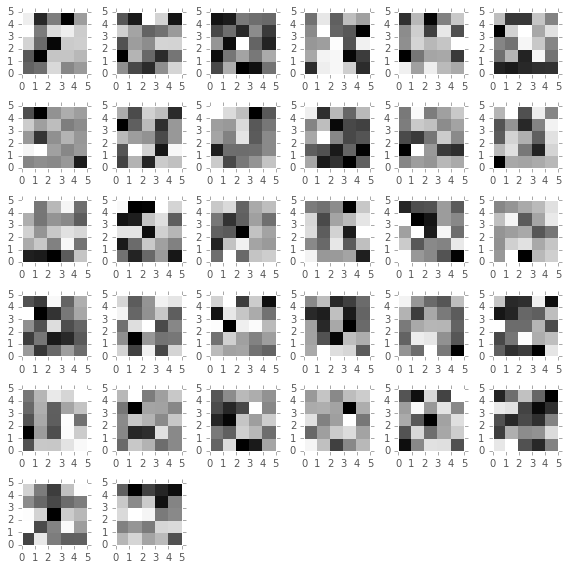

In [135]:
print(W1.shape)

plotLayerRaw(W1)

(5, 5, 32, 64)


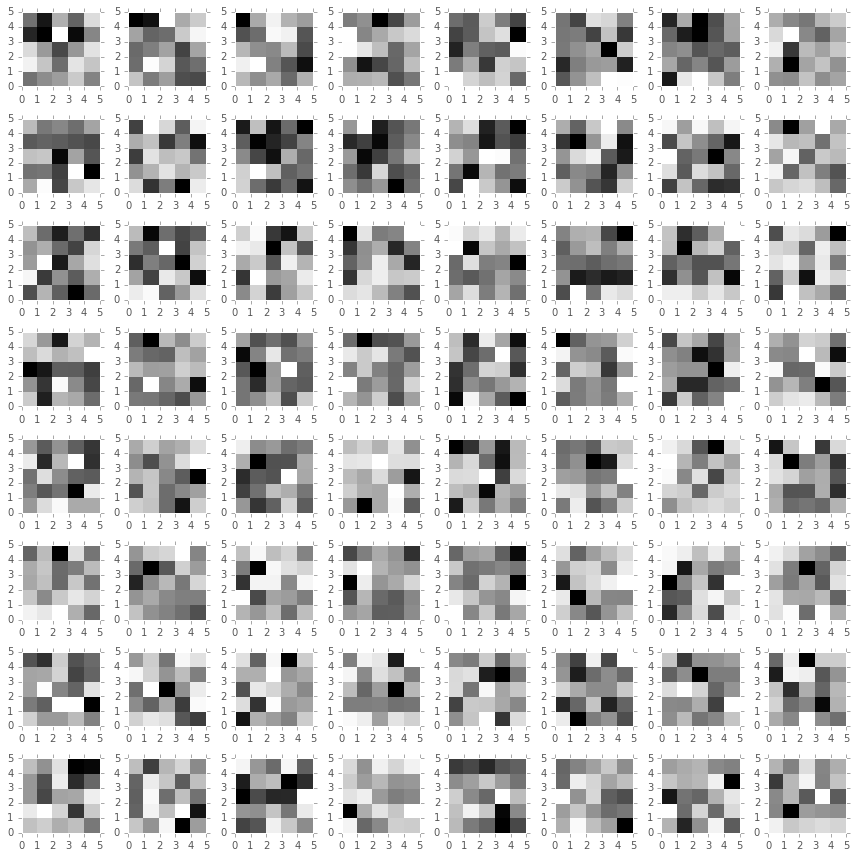

In [139]:
print(W2.shape)

plotLayerRaw(W2, dim2=0, figsize=[12,12])

## Saving and downloading models

In [128]:
saver = tf.train.Saver()
save_path = saver.save(sess, "/Users/kateniehaus/Dropbox/machine learning/Deep/Kadenze/model_4layerconvnet-mnist.ckpt")
print("Model saved in file: %s" % save_path)

Model saved in file: /Users/kateniehaus/Dropbox/machine learning/Deep/Kadenze/model_4layerconvnet-mnist.ckpt
